In [19]:
import cv2
import numpy as np
import os

import matplotlib.pyplot as plt

### Load the Camera matrix and Distortion Coefficient

In [20]:
with np.load('camera_matrix.npz') as file:
    mtx,dist=[file[i] for i in ['mtx','dist']]

In [21]:
wc = 10  ## 체스 보드 가로 패턴 개수 - 1
hc = 7  ## 체스 보드 세로 패턴 개수 - 1
objp = np.zeros((wc * hc, 3), np.float32)
objp[:, :2] = np.mgrid[0:wc, 0:hc].T.reshape(-1, 2)

In [22]:
axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)    #axis point for draw axis
                                                                 #this for draw a x,y,z axis

In [58]:
axis = np.float32([[0,0,0], [0,3,0], [3,3,0], [3,0,0],
                   [0,0,-3],[0,3,-3],[3,3,-3],[3,0,-3] ])    # this for draw a cube

### To draw cube

In [10]:
def draw_cube(img, corners, imgpts):
    imgpts = np.int32(imgpts).reshape(-1,2)
    img = cv2.drawContours(img, [imgpts[:4]],-1,(0,255,0),3)
    for i,j in zip(range(4),range(4,8)):
        img = cv2.line(img, tuple(imgpts[i]), tuple(imgpts[j]),(255),3)
    img = cv2.drawContours(img, [imgpts[4:]],-1,(0,0,255),3)
    return img

### To draw axis

In [55]:
def draw(img, corners, imgpts):
        corner = tuple(corners[0].ravel())
        print(corner)
        img = cv2.line(img, [int(i) for i in corner], [int(i) for i in imgpts[0].ravel()],(255, 0, 0),5)

        img = cv2.line(img, [int(i) for i in corner], [int(i) for i in imgpts[1].ravel()],(0, 255, 0),5)

        img = cv2.line(img, [int(i) for i in corner], [int(i) for i in imgpts[2].ravel()],(0, 0, 255),5)
        return img

In [60]:
objp

array([[0., 0., 0.],
       [1., 0., 0.],
       [2., 0., 0.],
       [3., 0., 0.],
       [4., 0., 0.],
       [5., 0., 0.],
       [6., 0., 0.],
       [7., 0., 0.],
       [8., 0., 0.],
       [9., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [2., 1., 0.],
       [3., 1., 0.],
       [4., 1., 0.],
       [5., 1., 0.],
       [6., 1., 0.],
       [7., 1., 0.],
       [8., 1., 0.],
       [9., 1., 0.],
       [0., 2., 0.],
       [1., 2., 0.],
       [2., 2., 0.],
       [3., 2., 0.],
       [4., 2., 0.],
       [5., 2., 0.],
       [6., 2., 0.],
       [7., 2., 0.],
       [8., 2., 0.],
       [9., 2., 0.],
       [0., 3., 0.],
       [1., 3., 0.],
       [2., 3., 0.],
       [3., 3., 0.],
       [4., 3., 0.],
       [5., 3., 0.],
       [6., 3., 0.],
       [7., 3., 0.],
       [8., 3., 0.],
       [9., 3., 0.],
       [0., 4., 0.],
       [1., 4., 0.],
       [2., 4., 0.],
       [3., 4., 0.],
       [4., 4., 0.],
       [5., 4., 0.],
       [6., 4., 0.],
       [7., 4

In [51]:
corners.reshape(hc,wc,2)

array([[[ 171.     , 1470.     ],
        [ 210.     , 1351.5    ],
        [ 242.64539, 1231.5774 ],
        [ 269.75754, 1118.7136 ],
        [ 292.68158, 1004.1224 ],
        [ 311.     ,  895.     ],
        [ 327.58182,  788.5319 ],
        [ 338.5812 ,  684.8309 ],
        [ 352.5    ,  581.5    ],
        [ 358.5    ,  477.5    ]],

       [[ 293.12766, 1462.4639 ],
        [ 329.5    , 1342.     ],
        [ 360.50598, 1223.9171 ],
        [ 384.5    , 1108.     ],
        [ 404.67303,  993.6087 ],
        [ 420.25485,  884.4147 ],
        [ 436.18976,  780.40784],
        [ 449.21036,  673.708  ],
        [ 462.88794,  572.3115 ],
        [ 467.75793,  470.6444 ]],

       [[ 417.     , 1453.5    ],
        [ 450.01965, 1334.4319 ],
        [ 479.     , 1213.5    ],
        [ 501.     , 1097.5    ],
        [ 519.5    ,  984.     ],
        [ 536.2296 ,  873.7703 ],
        [ 548.5    ,  768.5    ],
        [ 559.     ,  665.     ],
        [ 568.527  ,  563.4526 ],
        [ 

### Draw from Images

(70, 1, 2)
(3, 1, 2)
(171.0, 1470.0)
(1692, 1412, 3)


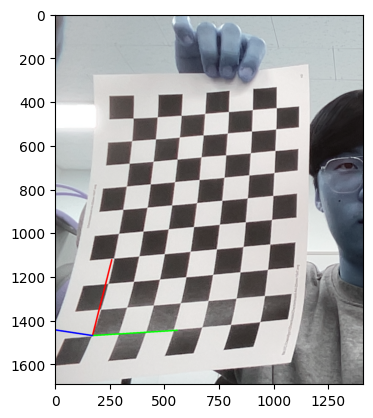

In [56]:
im=cv2.imread('./chess2.png')
gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,corners = cv2.findChessboardCorners(gray,(wc,hc),None)
print(corners.shape)
if ret == True:
    _,rvec,tvec,_=cv2.solvePnPRansac(objp,corners,mtx,dist)
    imgpts,_=cv2.projectPoints(axis,rvec,tvec,mtx,dist)
    print(imgpts.shape)
    img = draw(im,corners,imgpts)
    print(img.shape)
    plt.imshow(img)
    plt.show()


(70, 1, 2)
[[[ 183.33078  1478.856   ]]

 [[ 558.6223   1446.0759  ]]

 [[ 620.60754  1089.4325  ]]

 [[ 259.66904  1123.0248  ]]

 [[-106.74557  1428.0455  ]]

 [[ 291.70517  1390.7809  ]]

 [[ 364.75082  1016.40234 ]]

 [[ -17.159826 1057.4294  ]]]


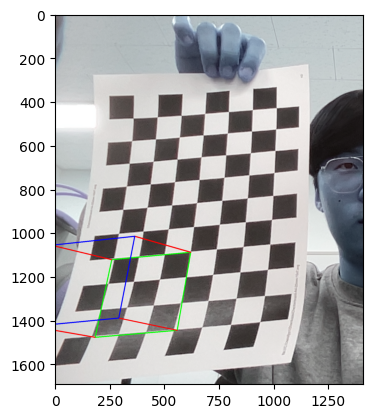

In [59]:
im=cv2.imread('./chess2.png')
gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,corners = cv2.findChessboardCorners(gray,(wc,hc),None)
print(corners.shape)
if ret == True:
    _,rvec,tvec,_=cv2.solvePnPRansac(objp,corners,mtx,dist)
    imgpts,_=cv2.projectPoints(axis,rvec,tvec,mtx,dist)
    print(imgpts)
    img = draw_cube(im,corners,imgpts)

    plt.imshow(img)
    plt.show()


### Draw from Video 

In [ ]:
cam=cv2.VideoCapture(0)
out = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (int(cam.get(3)),int(cam.get(4))))
while True:
    hasframe,frame=cam.read()
    if hasframe==False:
        break
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    ret,corners = cv2.findChessboardCorners(gray,(9,6),None)
    if ret == True:
        _,rvec,tvec,_=cv2.solvePnPRansac(objp,corners,mtx,dist)
        imgpts,_=cv2.projectPoints(axis,rvec,tvec,mtx,dist)
        frame = draw_cube(frame,corners,imgpts)
    cv2.imshow('images',frame)
    out.write(frame)
    if cv2.waitKey(1)==13:
        break
cv2.destroyAllWindows()
cam.release()